# Bitcoin Sheet

### Get results

In [149]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
df = pd.read_csv('runs (5).csv')
df.shape

(133, 738)

In [213]:
df.columns[:20]

Index(['Run ID', 'Name', 'Source Type', 'Source Name', 'User', 'Status',
       'buddy_name', 'date_end', 'date_start', 'features_size', 'h',
       'model_init', 'sample_size', 'train_fraction', 'coef_feature 0',
       'coef_feature 1', 'coef_feature 10', 'coef_feature 100',
       'coef_feature 101', 'coef_feature 102'],
      dtype='object')

In [205]:
# Keep right columns
df = df[['Run ID', 'buddy_name','date_end','date_start', 'features_size', 'h',
       'model_init', 'sample_size', 'train_fraction','mean_score','score_max','score_min','std']]

In [206]:
df.head()

,Run ID,buddy_name,date_end,date_start,features_size,h,model_init,sample_size,train_fraction,mean_score,score_max,score_min,std
0,34389f17595147c69738afe56ffd6f20,{'Anne-Constance'},2020,2020,30,10,"RidgeClassifier(alpha=1.0, class_weight=None, ...",129600,0.7,0.53,0.55,0.51,0.01
1,339de1ac72d64fa792635b828cd2f4be,{'Anne-Constance'},2020,2020,30,10,"RidgeClassifier(alpha=1.0, class_weight=None, ...",86400,0.7,0.53,0.55,0.50,0.01
2,0f0ae69b94154ecfacae0bc116bfe451,{'Anne-Constance'},2020,2020,30,10,"RidgeClassifier(alpha=1.0, class_weight=None, ...",43200,0.7,0.53,0.56,0.50,0.01
3,148cfa5687eb4cab893538c7f05e071a,{'Anne-Constance'},2020,2020,30,10,"RidgeClassifier(alpha=1.0, class_weight=None, ...",21600,0.7,0.53,0.57,0.47,0.02
4,4d2c8e9266b6412581126ef756a0b485,{'Anne-Constance'},2020,2020,30,10,"RidgeClassifier(alpha=1.0, class_weight=None, ...",14400,0.7,0.53,0.58,0.46,0.02


In [185]:
# Remove initial tests
df = df.dropna(axis=0, subset=['mean_score'])
df = df.dropna(axis=0, subset=['buddy_name'])
df = df[df['date_start'] == '2020']
df.shape

(54, 13)

In [186]:
# Only keep Ridge
df = df[df['model_init'].str.contains('RidgeClassifier')]

# Filter results

In [201]:
df[(df['std'] < 0.03) & (df['h'] == 10)].sort_values(by='mean_score', ascending=False).head(20)

,Run ID,buddy_name,date_end,date_start,features_size,h,model_init,sample_size,train_fraction,mean_score,score_max,score_min,std
0,34389f17595147c69738afe56ffd6f20,{'Anne-Constance'},2020,2020,30,10,"RidgeClassifier(alpha=1.0, class_weight=None, ...",129600,0.7,0.53,0.55,0.51,0.01
17,9d00e23a581b4f2b86d59aa170541ffa,{'Amelie'},2020,2020,300,10,"RidgeClassifier(alpha=1.0, class_weight=None, ...",43200,0.7,0.53,0.55,0.51,0.01
46,40f9ac0a257041248208aa7793e25c6b,{'Amelie'},2020,2020,60,10,"RidgeClassifier(alpha=1.0, class_weight=None, ...",10080,0.7,0.53,0.58,0.46,0.02
40,07e91df01c6148838de143a240027034,{'Nicolas'},2020,2020,60,10,"RidgeClassifier(alpha=1.0, class_weight=None, ...",10080,0.7,0.53,0.58,0.46,0.02
38,172f6ba8baad4a08b929f504d03668c3,{'Nicolas'},2020,2020,60,10,"RidgeClassifier(alpha=1.0, class_weight=None, ...",14400,0.7,0.53,0.58,0.46,0.02
37,a8aff0db97e84838af464791f77822c3,{'Nicolas'},2020,2020,60,10,"RidgeClassifier(alpha=1.0, class_weight=None, ...",21600,0.7,0.53,0.57,0.48,0.02
36,346ea46000be4db89e8d8c6b9e354c75,{'Nicolas'},2020,2020,60,10,"RidgeClassifier(alpha=1.0, class_weight=None, ...",43200,0.7,0.53,0.56,0.50,0.01
34,cfdea7e137cf46dcbbc8ff0a7b8e789b,{'Nicolas'},2020,2020,60,10,"RidgeClassifier(alpha=1.0, class_weight=None, ...",86400,0.7,0.53,0.55,0.50,0.01
33,43f8cc8432fe4e7c847bae14999cd56c,{'Nicolas'},2020,2020,60,10,"RidgeClassifier(alpha=1.0, class_weight=None, ...",129600,0.7,0.53,0.55,0.51,0.01
22,d6e3ab2d0f4d486a8cf00f963158e254,{'Amelie'},2020,2020,60,10,"RidgeClassifier(alpha=1.0, class_weight=None, ...",43200,0.7,0.53,0.56,0.51,0.01


# Graphs

## Sample sizes

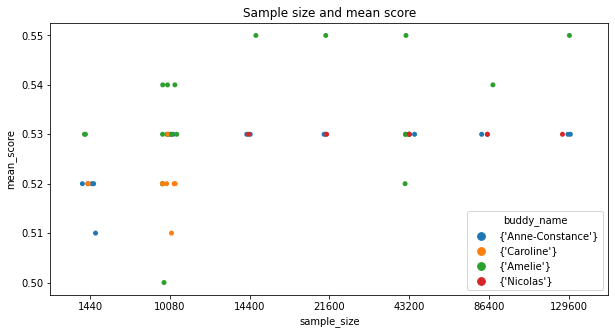

In [190]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.stripplot(x = df['sample_size'], y = df['mean_score'], axes = ax, hue= df['buddy_name'])
ax.set_title('Sample size and mean score');

# Stdv

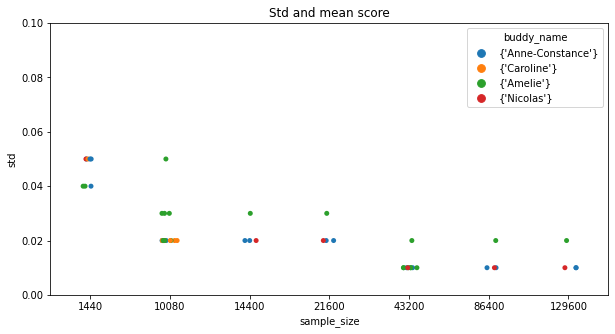

In [195]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.stripplot(x = df['sample_size'], y = df['std'], axes = ax,hue= df['buddy_name'])
ax.set_title('Std and mean score')
ax.set_ylim(0,0.1);

Sample size decreases 

# Feature Sizes

In [176]:
df.shape

(93, 13)

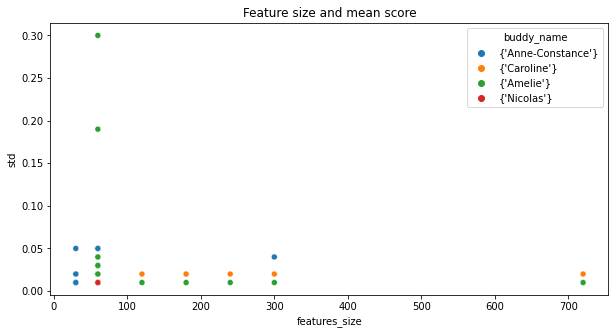

In [184]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x = df1['features_size'], y = df1['std'], axes = ax , hue= df1['buddy_name'])
ax.set_title('Feature size and mean score');

# Horizon

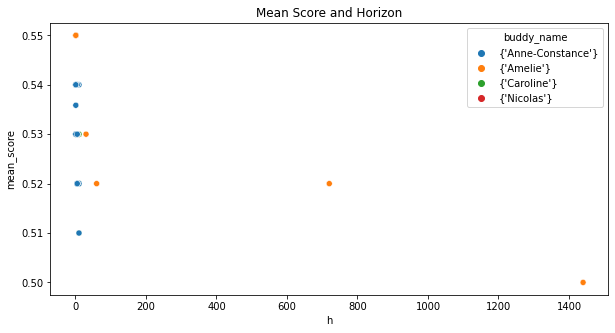

In [158]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x = df['h'], y = df['mean_score'], axes = ax,hue= df['buddy_name'])
ax.set_title('Mean Score and Horizon');